In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk as nl
nl.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Raag
[nltk_data]     Bhutani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# df=pd.read_csv("/content/drive/MyDrive/DIC MDaRT  Summer Training Feedback Form (Responses) - Form Responses 1.csv")
df=pd.read_csv("DIC MDaRT  Summer Training Feedback Form (Responses) - Form Responses 1.csv")
df.head()

,Timestamp,Name,Roll Number,University,Department (Stream),Semester of Study,Contact Number,Email,Select your program of Training,The mentor had adequate knowledge about the subject/course.,...,Please rate the course content,Please rate the study material provided to follow up with the classes,Do you feel these training sessions helped you in building confidence to speak up ?,Please rate how openly you could interact with your mentor in the class,Do you feel the course content was very high standard or as per your standard,How much do you feel has your knowledge has increased post training.,Were you able to meet your deadlines for submissions ?,Would you recommend your peers to intern at DIC MDaRT,Feedback in words,Suggestions
0,8/13/2021 10:17:59,Ashish Bhatia,UE199089,U.I.E.T CHANDIGARH (P.U),Mechanical engineering,5th,7018778851,bhatia.ashu2000@gmail.com,3D CAD and Modelling,Agree,...,4,5,5,5,Moderate and Doable,9,Yes,Yes,One of the best experience I ever had ..in rel...,Take care of Voice problem during e-classes
1,8/13/2021 10:39:22,Tarun Singla,UE194082,UIET.PU,EEE,5,7009267323,Tarunsingla30.11.12@gmail.com,3D CAD and Modelling,Agree,...,4,4,4,5,Moderate and Doable,7,Maybe,Maybe,Nice training,Work on communication lag
2,8/13/2021 11:04:44,Saksham Vashisht,UE199060,UIET PU,Mech,4,8295619251,sakshamvashisht07@gmail.com,3D CAD and Modelling,Strongly agree,...,5,5,5,5,Very High,10,Yes,Yes,Very nice,No suggestions
3,8/15/2021 13:21:57,Nitish Sharma,CO19142,Chandigarh College of Engineering and technology,Mechanical,5th,6283422281,nitishsharma12012002@gmail.com,3D CAD and Modelling,Strongly agree,...,5,4,4,5,Moderate and Doable,8,Yes,Yes,Learned a lot from this project.,Can increase the no of classes and offline ses...
4,8/15/2021 13:27:13,Yash Pal Singh,UE199086,PANJAB UNIVERSITY,U.I.E.T(Mechanical),3rd,7986459885,rajyash424@gmail.com,3D CAD and Modelling,Strongly agree,...,5,5,5,5,High,9,Yes,Yes,very good.,nothing at all....


Taking overview of the data provided

In [4]:
df.shape

(118, 24)

In [5]:
df.describe

<bound method NDFrame.describe of               Timestamp               Name  Roll Number  \
0    8/13/2021 10:17:59       Ashish Bhatia    UE199089   
1    8/13/2021 10:39:22        Tarun Singla    UE194082   
2    8/13/2021 11:04:44    Saksham Vashisht    UE199060   
3    8/15/2021 13:21:57       Nitish Sharma    CO19142    
4    8/15/2021 13:27:13      Yash Pal Singh    UE199086   
..                  ...                 ...         ...   
113  8/23/2021 15:36:43  Divyansh Chaudhary    UE204028   
114  8/23/2021 17:09:43       Snigdha Gupta    UE201072   
115   8/24/2021 6:09:57   Saket Kumar Sinha    UE204070   
116  8/24/2021 12:28:28      Diksha Mahajan    UE203036   
117  8/25/2021 16:37:05           Yog Gupta    UE201082   

                                            University  \
0                             U.I.E.T CHANDIGARH (P.U)   
1                                              UIET.PU   
2                                              UIET PU   
3    Chandigarh College o

In [6]:
df.info

<bound method DataFrame.info of               Timestamp               Name  Roll Number  \
0    8/13/2021 10:17:59       Ashish Bhatia    UE199089   
1    8/13/2021 10:39:22        Tarun Singla    UE194082   
2    8/13/2021 11:04:44    Saksham Vashisht    UE199060   
3    8/15/2021 13:21:57       Nitish Sharma    CO19142    
4    8/15/2021 13:27:13      Yash Pal Singh    UE199086   
..                  ...                 ...         ...   
113  8/23/2021 15:36:43  Divyansh Chaudhary    UE204028   
114  8/23/2021 17:09:43       Snigdha Gupta    UE201072   
115   8/24/2021 6:09:57   Saket Kumar Sinha    UE204070   
116  8/24/2021 12:28:28      Diksha Mahajan    UE203036   
117  8/25/2021 16:37:05           Yog Gupta    UE201082   

                                            University  \
0                             U.I.E.T CHANDIGARH (P.U)   
1                                              UIET.PU   
2                                              UIET PU   
3    Chandigarh College of 

In [7]:
df.corr()

,Contact Number,Please rate the course content,Please rate the study material provided to follow up with the classes,Do you feel these training sessions helped you in building confidence to speak up ?,Please rate how openly you could interact with your mentor in the class,How much do you feel has your knowledge has increased post training.
Contact Number,1.000000,-0.081446,0.077281,0.001996,0.157197,-0.018334
Please rate the course content,-0.081446,1.000000,0.622015,0.569764,0.313435,0.526911
Please rate the study material provided to follow up with the classes,0.077281,0.622015,1.000000,0.597090,0.274053,0.447463
Do you feel these training sessions helped you in building confidence to speak up ?,0.001996,0.569764,0.597090,1.000000,0.543187,0.525928
Please rate how openly you could interact with your mentor in the class,0.157197,0.313435,0.274053,0.543187,1.000000,0.300104
How much do you feel has your knowledge has increased post training.,-0.018334,0.526911,0.447463,0.525928,0.300104,1.000000


In [8]:
#Removing Contact number, as it is not required in correlation
data=df
data.drop(["Contact Number"],axis=1,inplace=True)
correlation = df.corr()
correlation

,Please rate the course content,Please rate the study material provided to follow up with the classes,Do you feel these training sessions helped you in building confidence to speak up ?,Please rate how openly you could interact with your mentor in the class,How much do you feel has your knowledge has increased post training.
Please rate the course content,1.000000,0.622015,0.569764,0.313435,0.526911
Please rate the study material provided to follow up with the classes,0.622015,1.000000,0.597090,0.274053,0.447463
Do you feel these training sessions helped you in building confidence to speak up ?,0.569764,0.597090,1.000000,0.543187,0.525928
Please rate how openly you could interact with your mentor in the class,0.313435,0.274053,0.543187,1.000000,0.300104
How much do you feel has your knowledge has increased post training.,0.526911,0.447463,0.525928,0.300104,1.000000


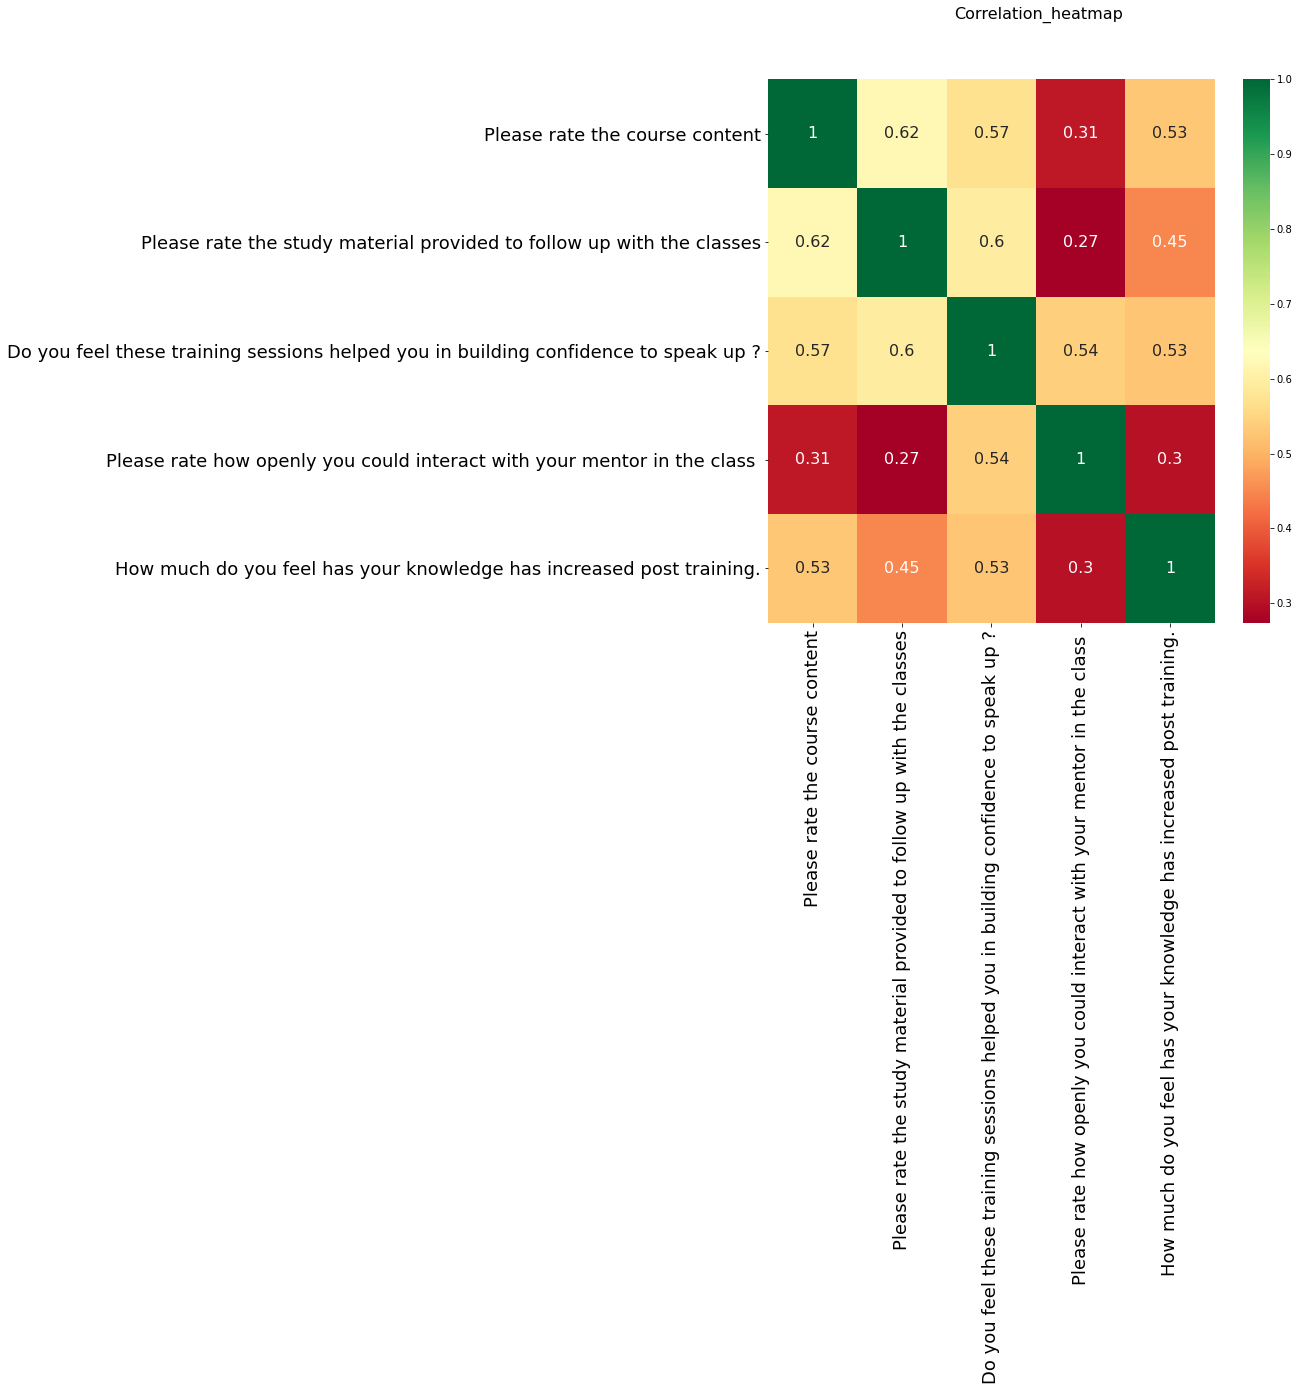

In [9]:
import seaborn as sns
plt.figure(figsize=(10,10))
res=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn",annot_kws={"size": 16})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)
plt.suptitle("Correlation_heatmap", size=16, y=0.98); 
plt.show()

In [10]:
#Now, here we have 2 null or na values in the suggestions column. It is not going to bother our data analysis, so it is not required to get replaced.
df.isna().sum()

Timestamp                                                                              0
Name                                                                                   0
Roll Number                                                                            0
University                                                                             0
Department (Stream)                                                                    0
Semester of Study                                                                      0
Email                                                                                  0
Select your program of Training                                                        0
The mentor had adequate knowledge about the subject/course.                            0
Mentor inspires me by their teaching.                                                  0
The mentor is punctual in the class.                                                   0
The mentor encourages

In [11]:
df.isna().sum().sum()

2

FEEDBACK IN WORDS (COMPLETE ANALYSIS)Using nltk



In [12]:
df['Feedback in words ']

0      One of the best experience I ever had ..in rel...
1                                         Nice training 
2                                             Very nice 
3                       Learned a lot from this project.
4                                             very good.
                             ...                        
113                                            Excellent
114                                                 Good
115    These programs are very helpful to increase th...
116    It was a very nice experience and training.Men...
117             The mentors were great, really helpful. 
Name: Feedback in words , Length: 118, dtype: object

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nl.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Raag
[nltk_data]     Bhutani\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
nl.download('stopwords')
from nltk.stem import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\Raag
[nltk_data]     Bhutani\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [15]:
def remove_stop_words(w_token):
    stop_words = set(nl.corpus.stopwords.words('english'))
    filtered_words = []
    ps = nl.stem.PorterStemmer()
    for tmp_word in w_token:
        if tmp_word not in stop_words:
            filtered_words.append(tmp_word)
    return filtered_words

In [16]:
def process_sentence(s):
    w_token = nl.tokenize.word_tokenize(s) 
    punctuations = [',','?','.',']','[','}','{','(',')','!','?',':',';','"','\'']
    t2 = []
    for w in w_token:
        if w not in punctuations:
            t2.append(w)
    t3 = remove_stop_words(t2)
    return t3

In [17]:
#Checking the working of the function
process_sentence("Raag is a , good [ at")

['Raag', 'good']

In [18]:
pos_word_list=[]
neg_word_list=[]
neu_word_list=[]
p,n,ne=0,0,0
for i in df['Feedback in words ']:
    words=process_sentence(i)
    for word in words:
      if (sid.polarity_scores(word)['compound']) >= 0.5:
        p+=1
      elif (sid.polarity_scores(word)['compound']) <= -0.5:
        n+=1
      else:
        ne+=1
    if(len(words)>0):
      if((p/len(words)>0.60)):
        pos_word_list.append('positive')
      elif((ne/len(words)>0.50)):
        neu_word_list.append('neutral')
      else:
        neg_word_list.append('negative')

In [19]:
pos_word_list

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',

In [20]:
neg_word_list

[]

In [21]:
neu_word_list

['neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral']

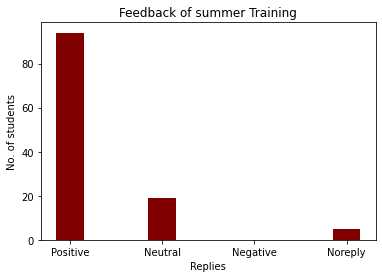

In [22]:
sum=len(pos_word_list)+len(neg_word_list)+len(neu_word_list)
noreply=df.shape[0]-sum
data = {'Positive':len(pos_word_list), 'Neutral':len(neu_word_list), 'Negative':len(neg_word_list),'Noreply':noreply}
keys= list(data.keys())
values = list(data.values())
plt.bar(keys,values,.3,color='maroon')
plt.xlabel("Replies")
plt.ylabel("No. of students")
plt.title("Feedback of summer Training")
plt.show()

In [23]:
#Bar chart representing the replies(Feedback) from students

SUGGESTIONS

In [24]:
df['Suggestions']

0            Take care of Voice problem during e-classes
1                              Work on communication lag
2                                        No suggestions 
3      Can increase the no of classes and offline ses...
4                                     nothing at all....
                             ...                        
113                             Everything was excellent
114                                                   No
115    Please provide some more time to those student...
116    Timings of class could be fixed like our semes...
117                                     Nothing specific
Name: Suggestions, Length: 118, dtype: object

No. of Students From Respective Branches

In [25]:
df['Department (Stream)'].str.lower().value_counts().head()

eee              19
cse              18
ece              16
it                8
biotechnology     6
Name: Department (Stream), dtype: int64

Program Selection For Training

In [26]:
#Since, here few students have two or more courses too. So we have to sort it out too and add that no. to the particular courses, so that we can get the exact data.

In [27]:
df['Select your program of Training'].str.lower().value_counts()

artificial intelligence and deep learning                                 49
3d cad and modelling                                                      17
data analysis using tableau                                               17
pcb and circuit designing                                                 11
dental aligners                                                           10
embedded systems and basic electronics                                     6
app development                                                            3
data acquisition - bio signals                                             1
embedded systems and basic electronics, 3d cad and modelling               1
maxillo cranio facial reconstruction                                       1
pcb and circuit designing, 3d cad and modelling                            1
artificial intelligence and deep learning, data analysis using tableau     1
Name: Select your program of Training, dtype: int64

In [28]:
dicton={'3D CAD and Modelling': 0, 'App Development': 0, 'Artificial Intelligence and Deep Learning': 0, 'Data acquisition - Bio signals': 0,'Data Analysis using Tableau':0, 'Dental Aligners': 0,'Embedded Systems and Basic Electronics': 0,'Maxillo Cranio Facial Reconstruction':0 ,'PCB and Circuit Designing':0}
for i in df['Select your program of Training']: 
  a=i.split(',')
  for j in a:
      if(j in dicton.keys()):
        dicton[j]+=1 
dicton

{'3D CAD and Modelling': 17,
 'App Development': 3,
 'Artificial Intelligence and Deep Learning': 50,
 'Data acquisition - Bio signals': 1,
 'Data Analysis using Tableau': 17,
 'Dental Aligners': 10,
 'Embedded Systems and Basic Electronics': 7,
 'Maxillo Cranio Facial Reconstruction': 1,
 'PCB and Circuit Designing': 12}

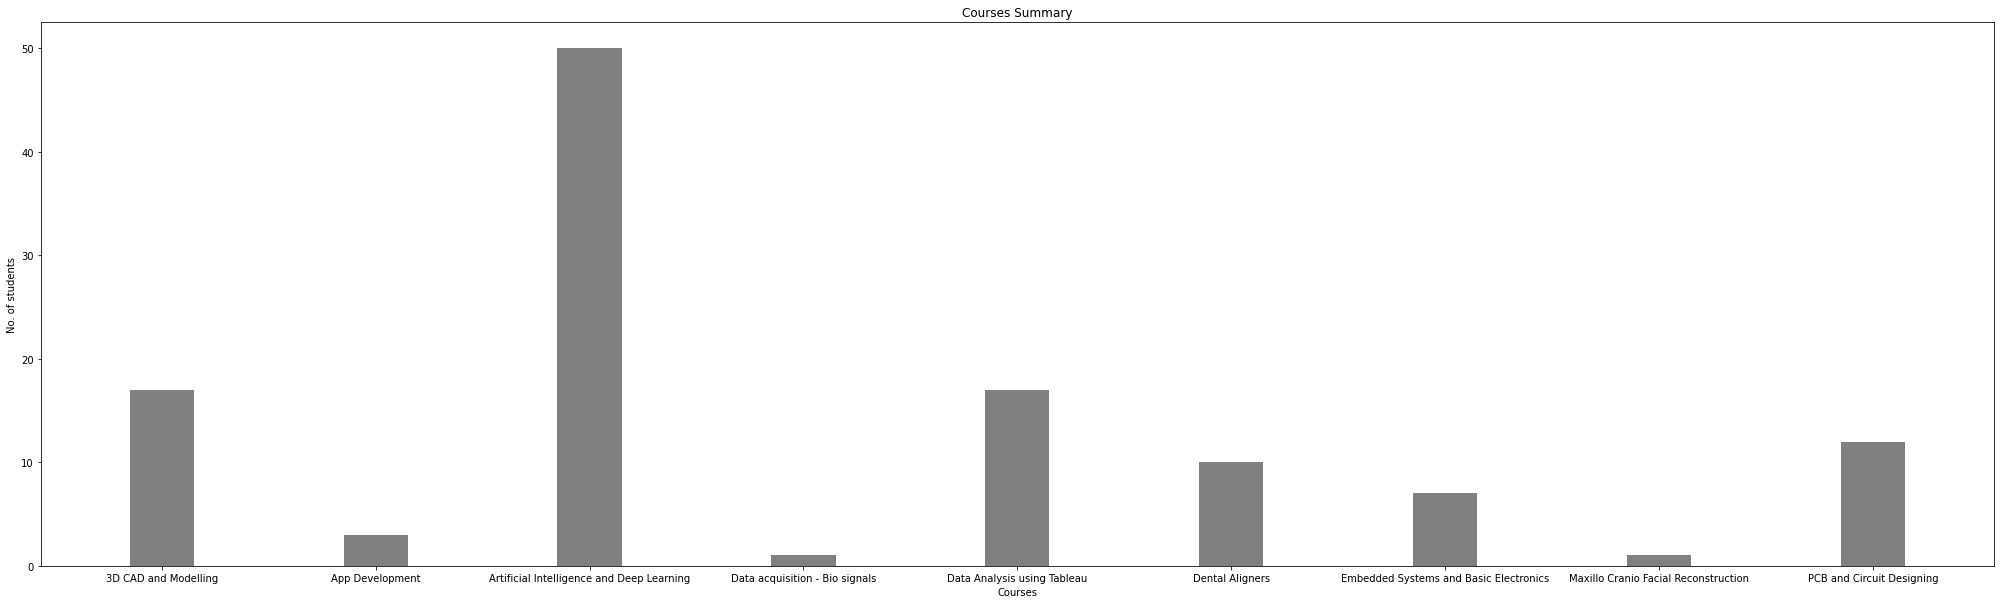

In [29]:
course= list(dicton.keys())
value = list(dicton.values())
plt.figure(figsize=(35,10))
plt.bar(course,value,.3,color='gray')
plt.xlabel("Courses")
plt.ylabel("No. of students")
plt.title("Courses Summary")
plt.show()

In [30]:
#Representing the no. of students in the respective courses through bar chart

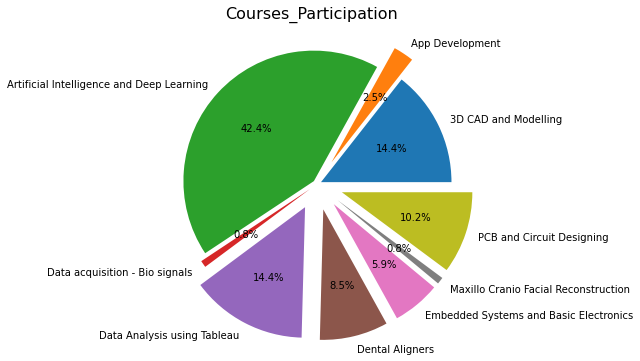

In [31]:
plt.pie(value,labels=course,radius=1.5,autopct="%0.1f%%",explode=[0.05,0.3,0.05,0.1,0.3,0.3,0.3,0.3,0.3])
# plt.ioff()
plt.suptitle("Courses_Participation", size=16, y=1.12); 
plt.savefig('Courses_Pacipation.png')
plt.show()

In [32]:
#Representing the no. of students in the respective courses through pie chart

In [33]:
df.columns

Index(['Timestamp', 'Name ', 'Roll Number', 'University',
       'Department (Stream)', 'Semester of Study', 'Email ',
       'Select your program of Training',
       'The mentor had adequate knowledge about the subject/course. ',
       'Mentor inspires me by their teaching. ',
       'The mentor is punctual in the class.',
       'The mentor encourages participation and discussion in the class.',
       'The mentor uses teaching aids, e-resources, gives suitable references.',
       'Please rate the course content',
       'Please rate the study material provided to follow up with the classes',
       'Do you feel these training sessions helped you in building confidence to speak up ?',
       'Please rate how openly you could interact with your mentor in the class ',
       'Do you feel the course content was very high standard or as per your standard',
       'How much do you feel has your knowledge has increased post training.',
       'Were you able to meet your deadlines for su

Complete Feedback for Mentors

In [34]:
#All combined feedback for mentors ,rated out.

In [61]:
dicton2=dict(df['The mentor had adequate knowledge about the subject/course. '].value_counts())
dicton3=dict(df['Mentor inspires me by their teaching. '].value_counts())
dicton4=dict(df['The mentor encourages participation and discussion in the class.'].value_counts())
dicton5=dict(df['The mentor uses teaching aids, e-resources, gives suitable references.'].value_counts())
print(dicton2)
print(dicton3)
print(dicton4)
print(dicton5)

{'Agree': 57, 'Strongly agree': 55, 'Neutral': 4, 'Strongly disagree': 2}
{'Strongly agree': 51, 'Agree': 51, 'Neutral': 13, 'Strongly disagree': 2, 'Disagree': 1}
{'Strongly agree': 73, 'Agree': 42, 'Strongly disagree': 2, 'Neutral': 1}
{'Strongly agree': 71, 'Agree': 37, 'Neutral': 7, 'Strongly disagree': 2, 'Disagree': 1}


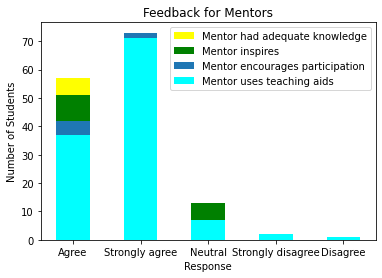

<Figure size 432x288 with 0 Axes>

In [36]:
plt.bar(dicton2.keys(),dicton2.values(),0.5,label="Mentor had adequate knowledge",color='yellow')
plt.bar(dicton3.keys(),dicton3.values(),0.5,label="Mentor inspires",color='green')
plt.bar(dicton4.keys(),dicton4.values(),0.5,label="Mentor encourages participation")
plt.bar(dicton5.keys(),dicton5.values(),0.5,label="Mentor uses teaching aids",color='cyan')
plt.xlabel("Response")
plt.ylabel("Number of Students")
plt.title("Feedback for Mentors")
plt.legend()
plt.show()
plt.savefig('Feedback for_mentors.png')

In [37]:
#Plotted the stack bar graph for the data

In [38]:
#Now, plotting pie charts for each and every questions written above for mentors(same data)

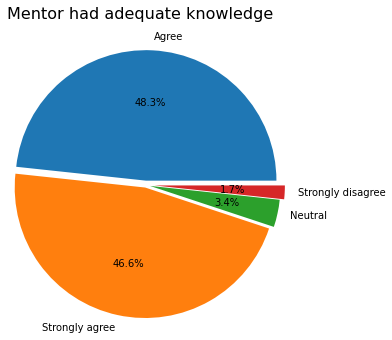

In [39]:
plt.pie(dicton2.values(),labels=dicton2.keys(),radius=1.5,autopct="%0.1f%%",explode=[0.05,0.03,0.05,0.1])
plt.suptitle("Mentor had adequate knowledge", size=16, y=1.12); 
plt.show()

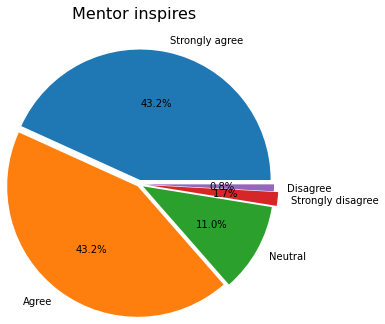

In [40]:
plt.pie(dicton3.values(),labels=dicton3.keys(),radius=1.5,autopct="%0.1f%%",explode=[0.05,0.03,0.05,0.1,0.05])
plt.suptitle("Mentor inspires", size=16, y=1.12); 
plt.show()

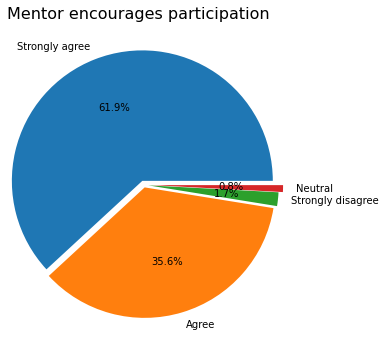

In [41]:
plt.pie(dicton4.values(),labels=dicton4.keys(),radius=1.5,autopct="%0.1f%%",explode=[0.05,0.03,0.05,0.1])
plt.suptitle("Mentor encourages participation", size=16, y=1.12); 
plt.show()

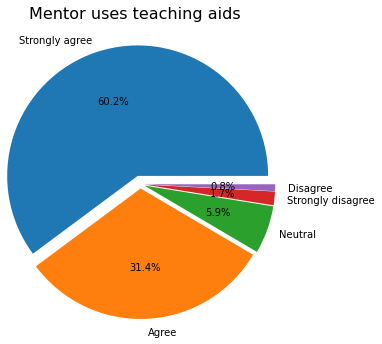

In [42]:
plt.pie(dicton5.values(),labels=dicton5.keys(),radius=1.5,autopct="%0.1f%%",explode=[0.1,0.05,0.05,0.05,0.05])
plt.suptitle("Mentor uses teaching aids", size=16, y=1.12); 
plt.show()

Complete Feedback for the contents and interaction in training 

In [43]:
#All combined feedback for the complete course ,rated out of 5.

In [44]:
var1= df['Please rate the course content'].value_counts()
var2= df['Do you feel these training sessions helped you in building confidence to speak up ?'].value_counts()
var3= df['Please rate the study material provided to follow up with the classes'].value_counts()
var4= df['Please rate how openly you could interact with your mentor in the class '].value_counts()
keys1= var1.keys()
keys2 = var2.keys()
keys3 = var3.keys()
keys4= var4.keys()
val1 = var1.values
val2 = var2.values
val3 = var3.values
val4 = var4.values

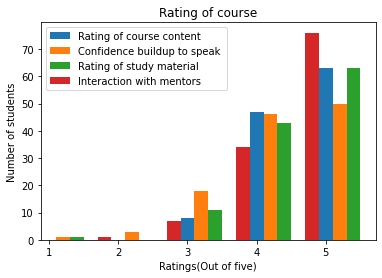

<Figure size 432x288 with 0 Axes>

In [45]:
plt.figure(figsize=(6,4))
w=0.2
keys5 = [i+w for i in keys2]
keys6 = [i+2*w for i in keys3]
keys7 = [i-w for i in keys4]
plt.bar(keys1,val1,w,label="Rating of course content")
plt.bar(keys5,val2,w,label="Confidence buildup to speak ")
plt.bar(keys6,val3,w,label="Rating of study material")
plt.bar(keys7,val4,w,label="Interaction with mentors")
plt.xlabel("Ratings(Out of five)")
plt.ylabel("Number of students")
plt.title("Rating of course")
plt.legend()
plt.show()
plt.savefig('Ratings_content.png')

In [46]:
#Plotted the multiple bar chart.

Content standards

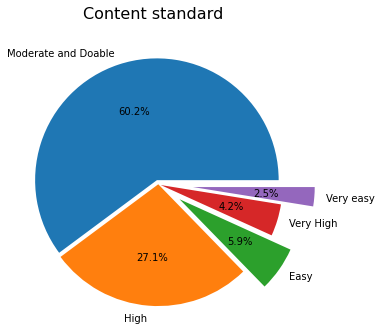

In [47]:
standard= dict(df['Do you feel the course content was very high standard or as per your standard'].value_counts())
key=standard.keys()
plt.pie(standard.values(),labels=key,radius=1.4,autopct="%0.1f%%",explode=[0.05,0,0.3,0.03,0.4])
plt.suptitle("Content standard", size=16, y=1.12); 
plt.show()

In [48]:
#Plotted the pie graph for the data

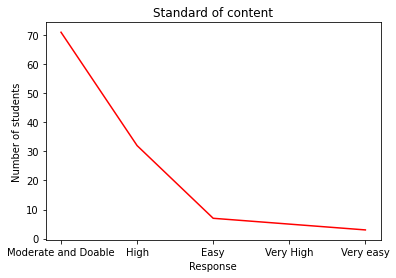

In [49]:
standard1= df['Do you feel the course content was very high standard or as per your standard'].value_counts()
plt.plot(standard1.keys(),standard1.values,'r',label='mentors are inspiring')
plt.xlabel('Response')
plt.ylabel('Number of students')
plt.title('Standard of content')
plt.show()

In [50]:
#Plotted the line graph for the data

Knowledge(post training) 

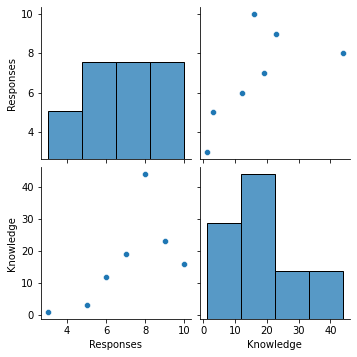

In [51]:
import seaborn as sns
knowledge=df['How much do you feel has your knowledge has increased post training.'].value_counts()
pairdf = pd.DataFrame({'Responses':knowledge.keys(), 'Knowledge': knowledge.values})
sns.pairplot(pairdf)
plt.show()

In [52]:
#Plotted the pairplot for the data

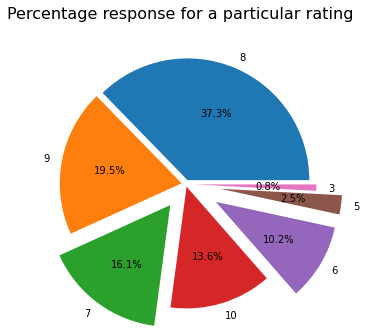

In [53]:
plt.figure(figsize=(6,4))
knowledge1= dict(df['How much do you feel has your knowledge has increased post training.'].value_counts())
k=knowledge1.keys()
# plt.title("Percentage response for a particular rating")
plt.suptitle("Percentage response for a particular rating", size=16, y=1.12)   
plt.pie(knowledge1.values(),labels=k,radius=1.4,autopct="%0.1f%%",explode=[0.05,0.05,0.3,0.03,0.4,0.4,0.1])
plt.show()

In [54]:
#Plotted the pie graph for the data

Deadline meeting and Recommendations to peers

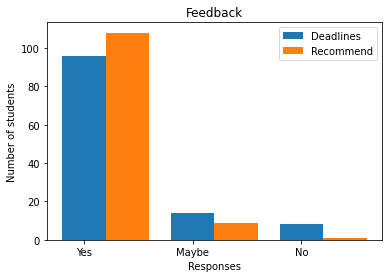

In [55]:
dead=df['Were you able to meet your deadlines for submissions ?'].value_counts()
rec=df['Would you recommend your peers to intern at DIC MDaRT'].value_counts()
deadk=dead.keys()
deadval=dead.values
reck=[0,1,2]
recval=rec.values
plt.figure(figsize=(6,4))
w=0.4
reckey= [i+w for i in reck]
plt.bar(deadk,deadval,w,label="Deadlines")
plt.bar(reckey,recval,w,label="Recommend")
plt.xlabel("Responses")
plt.ylabel("Number of students")
plt.title("Feedback")
plt.legend()
plt.show()

In [56]:
#Plotted the multiple Bar graph for the data

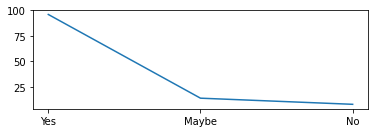

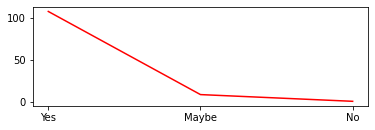

In [57]:
plt.subplot(2,1,1)
plt.plot(deadk,deadval)
plt.show()
plt.subplot(2,1,2)
plt.plot(rec.keys(),recval,color='r')
plt.show()

In [58]:
#Plotted the subplot graph for the data

Hence, this is the complete exploratory data analysis of the data provided.